# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
#from api_keys import weather_api_key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

In [4]:
cities

['port elizabeth',
 'souillac',
 'sinkat',
 'tilichiki',
 'vaini',
 'bredasdorp',
 'beringovskiy',
 'rikitea',
 'hilo',
 'ushuaia',
 'itarema',
 'lebu',
 'jedburgh',
 'mirnyy',
 'saiha',
 'punta arenas',
 'bac lieu',
 'kapaa',
 'jamestown',
 'atuona',
 'hobart',
 'ahipara',
 'ribeira grande',
 'tsihombe',
 'sentyabrskiy',
 'oudtshoorn',
 'mataura',
 'luganville',
 'boa esperanca',
 'saint george',
 'cayenne',
 'olafsvik',
 'grand river south east',
 'sirajganj',
 'rio grande',
 'busselton',
 'severo-kurilsk',
 'kasane',
 'ilulissat',
 'dikson',
 'hualmay',
 'illoqqortoormiut',
 'teguldet',
 'butaritari',
 'arlit',
 'saint-philippe',
 'cidreira',
 'langsa',
 'salo',
 'caravelas',
 'barrow',
 'georgetown',
 'chabahar',
 'louisbourg',
 'bengkulu',
 'luderitz',
 'cherskiy',
 'albany',
 'anadyr',
 'thompson',
 'uray',
 'majene',
 'hermanus',
 'la ronge',
 'tumannyy',
 'omsukchan',
 'port alfred',
 'banmo',
 'clyde river',
 'bluff',
 'ekhabi',
 'dom pedrito',
 'victoria',
 'san patricio',
 '

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city_test = "port elizabeth"
units = "imperial"

# Build query URL
query_url = f"{url}q={city_test}&appid={api_key}&units={units}"

res1 = requests.get(query_url)
res1_json = res1.json()

# Get the temperature from the response
print(f"The weather API responded with: {res1}.")

The weather API responded with: <Response [200]>.


In [6]:
pprint(res1_json)

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -33.918, 'lon': 25.5701},
 'dt': 1612242716,
 'id': 964420,
 'main': {'feels_like': 59.43,
          'humidity': 68,
          'pressure': 1021,
          'temp': 66.2,
          'temp_max': 66.2,
          'temp_min': 66.2},
 'name': 'Port Elizabeth',
 'sys': {'country': 'ZA',
         'id': 1973,
         'sunrise': 1612237221,
         'sunset': 1612286547,
         'type': 1},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 70, 'speed': 14.97}}


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

city_name = []
lat_coord = []
lng_coord = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

header = "Beginning Data Retrieval\n-----------------------------"
footer = "-----------------------------\nData Retrieval Complete\n-----------------------------"
record_count = 0
set_count = 0

print(header)
for city in cities:
    
    query_url = f"{url}q={city}&appid={api_key}&units={units}"
    response = requests.get(query_url).json()
    
    try:
        city_name.append(response['name'].title())
        lat_coord.append(response['coord']['lat'])
        lng_coord.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
    except:
        print("City not found. Skipping...")
    
    if record_count == 0:
        set_count += 1  
    
    if record_count >= 50:
        set_count += 1
        record_count = 0

    record_count += 1
    print(f"Processing Record {record_count} of Set {set_count} | {city.title()}")
    
print(footer)

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | Port Elizabeth
Processing Record 2 of Set 1 | Souillac
City not found. Skipping...
Processing Record 3 of Set 1 | Sinkat
Processing Record 4 of Set 1 | Tilichiki
Processing Record 5 of Set 1 | Vaini
Processing Record 6 of Set 1 | Bredasdorp
Processing Record 7 of Set 1 | Beringovskiy
Processing Record 8 of Set 1 | Rikitea
Processing Record 9 of Set 1 | Hilo
Processing Record 10 of Set 1 | Ushuaia
Processing Record 11 of Set 1 | Itarema
Processing Record 12 of Set 1 | Lebu
Processing Record 13 of Set 1 | Jedburgh
Processing Record 14 of Set 1 | Mirnyy
Processing Record 15 of Set 1 | Saiha
Processing Record 16 of Set 1 | Punta Arenas
Processing Record 17 of Set 1 | Bac Lieu
Processing Record 18 of Set 1 | Kapaa
Processing Record 19 of Set 1 | Jamestown
Processing Record 20 of Set 1 | Atuona
Processing Record 21 of Set 1 | Hobart
Processing Record 22 of Set 1 | Ahipara
Processing Record 23 of Set 1 | Rib

Processing Record 38 of Set 4 | Grand-Lahou
Processing Record 39 of Set 4 | Verkhnyaya Inta
City not found. Skipping...
Processing Record 40 of Set 4 | Mys Shmidta
City not found. Skipping...
Processing Record 41 of Set 4 | Mendahara
Processing Record 42 of Set 4 | Hailar
Processing Record 43 of Set 4 | Cordoba
Processing Record 44 of Set 4 | Ayorou
Processing Record 45 of Set 4 | Toba
Processing Record 46 of Set 4 | Raduzhnyy
Processing Record 47 of Set 4 | Meulaboh
Processing Record 48 of Set 4 | Fortuna
Processing Record 49 of Set 4 | San Cristobal
Processing Record 50 of Set 4 | Dumas
Processing Record 1 of Set 5 | Cabedelo
City not found. Skipping...
Processing Record 2 of Set 5 | Tasbuget
Processing Record 3 of Set 5 | Arraial Do Cabo
Processing Record 4 of Set 5 | Vestmannaeyjar
Processing Record 5 of Set 5 | Fukue
Processing Record 6 of Set 5 | Hoi An
Processing Record 7 of Set 5 | San Carlos De Bariloche
Processing Record 8 of Set 5 | Kuito
City not found. Skipping...
Processi

Processing Record 24 of Set 8 | Waddan
Processing Record 25 of Set 8 | Quibdo
Processing Record 26 of Set 8 | Lensk
Processing Record 27 of Set 8 | Tommot
Processing Record 28 of Set 8 | Eina
Processing Record 29 of Set 8 | Baker City
Processing Record 30 of Set 8 | Huarmey
City not found. Skipping...
Processing Record 31 of Set 8 | Solovetskiy
Processing Record 32 of Set 8 | Nishihara
Processing Record 33 of Set 8 | Huilong
Processing Record 34 of Set 8 | Kargopol
Processing Record 35 of Set 8 | Cap Malheureux
Processing Record 36 of Set 8 | Alyangula
Processing Record 37 of Set 8 | Manggar
Processing Record 38 of Set 8 | Fort Nelson
Processing Record 39 of Set 8 | Manzhouli
Processing Record 40 of Set 8 | Siilinjarvi
Processing Record 41 of Set 8 | Lufilufi
Processing Record 42 of Set 8 | Vostok
Processing Record 43 of Set 8 | Lishui
Processing Record 44 of Set 8 | Nikolskoye
Processing Record 45 of Set 8 | Baykalsk
Processing Record 46 of Set 8 | South Sioux City
Processing Record 4

Processing Record 13 of Set 12 | Vizinga
Processing Record 14 of Set 12 | Arrifes
Processing Record 15 of Set 12 | Naica
Processing Record 16 of Set 12 | Novomykolayivka
Processing Record 17 of Set 12 | Pacific Grove
Processing Record 18 of Set 12 | Egvekinot
Processing Record 19 of Set 12 | Teofilo Otoni
Processing Record 20 of Set 12 | Nemuro
Processing Record 21 of Set 12 | Hoquiam
Processing Record 22 of Set 12 | Hazaribag
Processing Record 23 of Set 12 | Pantai Remis
Processing Record 24 of Set 12 | Amberley
Processing Record 25 of Set 12 | Buin
Processing Record 26 of Set 12 | Pyay
Processing Record 27 of Set 12 | Kjopsvik
Processing Record 28 of Set 12 | Epe
Processing Record 29 of Set 12 | Tonantins
City not found. Skipping...
Processing Record 30 of Set 12 | Urdzhar
Processing Record 31 of Set 12 | Takoradi
Processing Record 32 of Set 12 | Itoman
Processing Record 33 of Set 12 | Barda
Processing Record 34 of Set 12 | Kota Belud
Processing Record 35 of Set 12 | Baykit
Processin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
city_data = {
    "City": city_name,
    "Lat": lat_coord,
    "Lng": lng_coord,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}
city_df = pd.DataFrame(city_data)

city_df.to_csv(output_data_file)

city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Elizabeth,-33.9180,25.5701,66.20,68,0,14.97,ZA,1612242721
1,Souillac,-20.5167,57.5167,86.00,70,40,14.97,MU,1612242983
2,Tilichiki,60.4667,166.1000,8.15,96,100,8.52,RU,1612242984
3,Vaini,-21.2000,-175.2000,82.40,78,40,25.32,TO,1612242985
4,Bredasdorp,-34.5322,20.0403,64.40,55,0,11.50,ZA,1612242985
...,...,...,...,...,...,...,...,...,...
549,Ziro,27.6333,93.8333,69.80,56,20,5.75,IN,1612243115
550,Columbus,39.9612,-82.9988,27.00,86,90,12.66,US,1612243020
551,Conde,-7.2597,-34.9075,78.80,78,20,6.91,BR,1612243116
552,Mbigou,-1.9005,11.9060,68.32,98,100,2.37,GA,1612243033


In [15]:
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,5.540000e+02
mean,19.459371,18.969781,49.380090,75.227437,54.097473,8.504458,1.612243e+09
std,33.825722,92.528470,32.586735,19.212966,39.684213,6.337982,8.239684e+01
min,-54.800000,-179.166700,-44.050000,16.000000,0.000000,0.130000,1.612243e+09
25%,-8.883375,-62.847250,26.585000,67.000000,14.000000,3.792500,1.612243e+09
50%,23.454750,21.993400,62.010000,79.500000,63.000000,6.910000,1.612243e+09
75%,49.212525,102.140800,74.835000,89.000000,92.750000,11.500000,1.612243e+09
max,78.218600,179.316700,104.000000,100.000000,100.000000,44.740000,1.612243e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [16]:
city_df.loc[city_df['Humidity'] > 100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

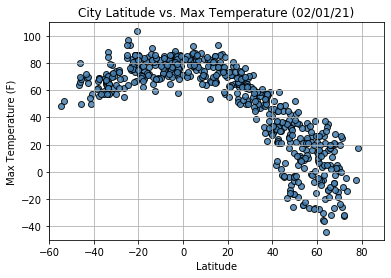

In [17]:
x_values = city_df['Lat']
y_values = city_df['Max Temp']

plt.scatter(x_values, y_values, marker="o", facecolors="steelblue", edgecolors="black", alpha = 0.85)
plt.title('City Latitude vs. Max Temperature (02/01/21)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(b=True, which='major', axis='both')
plt.ylim(-50,110)
plt.xlim(-60,90)
plt.show()

## Latitude vs. Humidity Plot

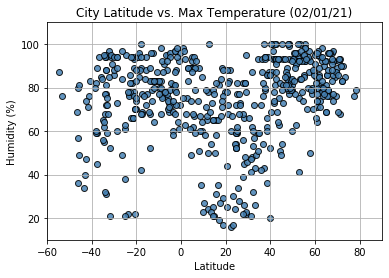

In [21]:
x_values = city_df['Lat']
y_values = city_df['Humidity']

plt.scatter(x_values, y_values, marker="o", facecolors="steelblue", edgecolors="black", alpha = 0.85)
plt.title('City Latitude vs. Max Temperature (02/01/21)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(b=True, which='major', axis='both')
plt.ylim(10,110)
plt.xlim(-60,90)
plt.show()

## Latitude vs. Cloudiness Plot

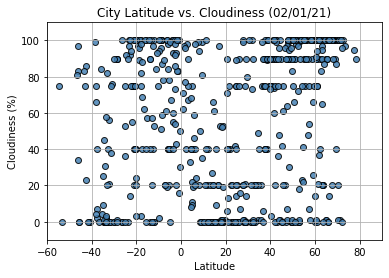

In [22]:
x_values = city_df['Lat']
y_values = city_df['Cloudiness']

plt.scatter(x_values, y_values, marker="o", facecolors="steelblue", edgecolors="black", alpha = 0.85)
plt.title('City Latitude vs. Cloudiness (02/01/21)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(b=True, which='major', axis='both')
plt.ylim(-10,110)
plt.xlim(-60,90)
plt.show()

## Latitude vs. Wind Speed Plot

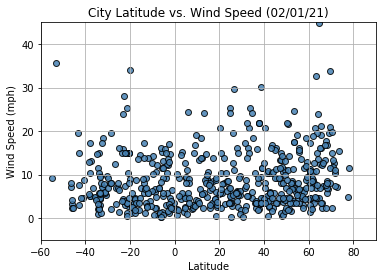

In [23]:
x_values = city_df['Lat']
y_values = city_df['Wind Speed']

plt.scatter(x_values, y_values, marker="o", facecolors="steelblue", edgecolors="black", alpha = 0.85)
plt.title('City Latitude vs. Wind Speed (02/01/21)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(b=True, which='major', axis='both')
plt.ylim(-5, 45)
plt.xlim(-60,90)
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


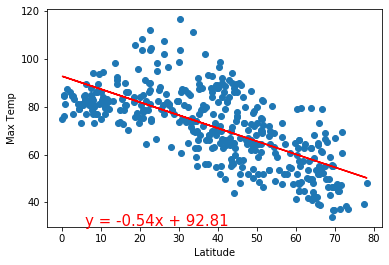

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


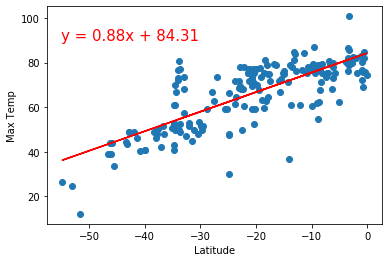

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


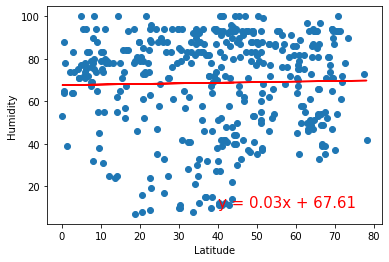

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


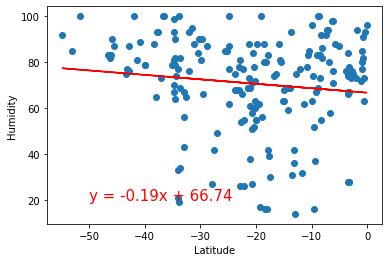

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


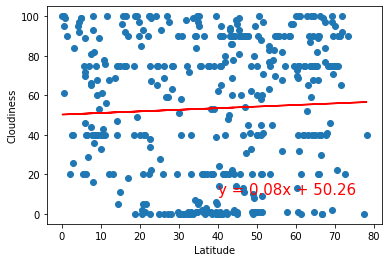

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


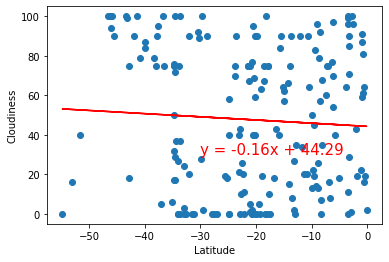

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


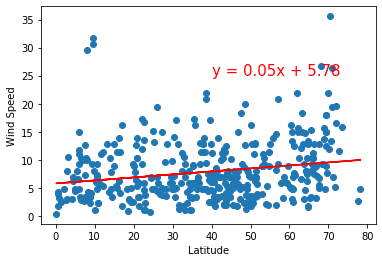

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


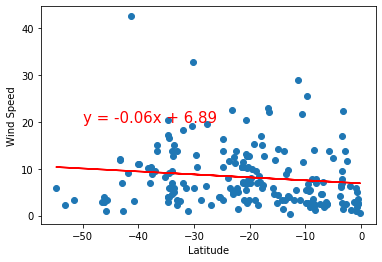